<a href="https://colab.research.google.com/github/nandhinishankarl/Exploratory-Data-Analysis-Projects/blob/main/MetroBikeShare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/metro-trips-2024-q4 2.csv')

In [ ]:
df.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,443636252,6,10/1/2024 0:04,10/1/2024 0:10,4300,34.048870,-118.274300,4449,34.045570,-118.274193,30348,30,One Way,Monthly Pass,electric
1,443636329,3,10/1/2024 0:13,10/1/2024 0:16,4492,34.036869,-118.425499,4564,34.035351,-118.434143,28892,30,One Way,Monthly Pass,electric
2,443636504,18,10/1/2024 0:26,10/1/2024 0:44,4680,34.043522,-118.255089,3006,34.045540,-118.256668,13300,30,One Way,Monthly Pass,standard
3,443636507,2,10/1/2024 0:43,10/1/2024 0:45,3075,34.042110,-118.256187,4680,34.043522,-118.255089,6209,30,One Way,Monthly Pass,standard
4,443636562,4,10/1/2024 0:45,10/1/2024 0:49,4680,34.043522,-118.255089,3005,34.048500,-118.258537,20083,30,One Way,Monthly Pass,standard


In [ ]:
df.shape

(120854, 15)

In [ ]:
df.isnull().sum()

,0
trip_id,0
duration,0
start_time,0
end_time,0
start_station,0
start_lat,13
start_lon,13
end_station,0
end_lat,3363
end_lon,3363


In [ ]:
# percentage of missing values for stop_lat and stop_lon
int(df['end_lat'].isnull().sum())/int(len(df)) * 100

2.78269647674053

In [ ]:
df = df.dropna(subset=['end_lat','end_lon'])
df.isnull().sum()

,0
trip_id,0
duration,0
start_time,0
end_time,0
start_station,0
start_lat,3
start_lon,3
end_station,0
end_lat,0
end_lon,0


In [ ]:
df = df.dropna(subset=['start_lat','start_lon'])
df.isnull().sum()

,0
trip_id,0
duration,0
start_time,0
end_time,0
start_station,0
start_lat,0
start_lon,0
end_station,0
end_lat,0
end_lon,0


In [ ]:
df['duration'].describe()

,duration
count,117488.000000
mean,29.365033
std,82.307340
min,1.000000
25%,7.000000
50%,14.000000
75%,26.000000
max,1440.000000


In [ ]:
# extracting the first two characters (aka the month)
# string values
df['month'] = df['start_time'].str[:2]
df['month']

,month
0,10
1,10
2,10
3,10
4,10
...,...
120849,12
120850,12
120851,12
120852,12


In [ ]:
# checking if somehow there are null values in month, nothing so far yay
df.isnull().sum()

,0
trip_id,0
duration,0
start_time,0
end_time,0
start_station,0
start_lat,0
start_lon,0
end_station,0
end_lat,0
end_lon,0


In [ ]:
import calendar

# Using python's built in calendar module to convert month numbers to month names
# converting values to integer values before converting
df['month'] = df['month'].apply(lambda x: calendar.month_name[int(x)])

In [ ]:
df['month'].value_counts()

,count
month,
October,49014
November,38502
December,29972


Text(0, 0.5, 'Number of Rides')

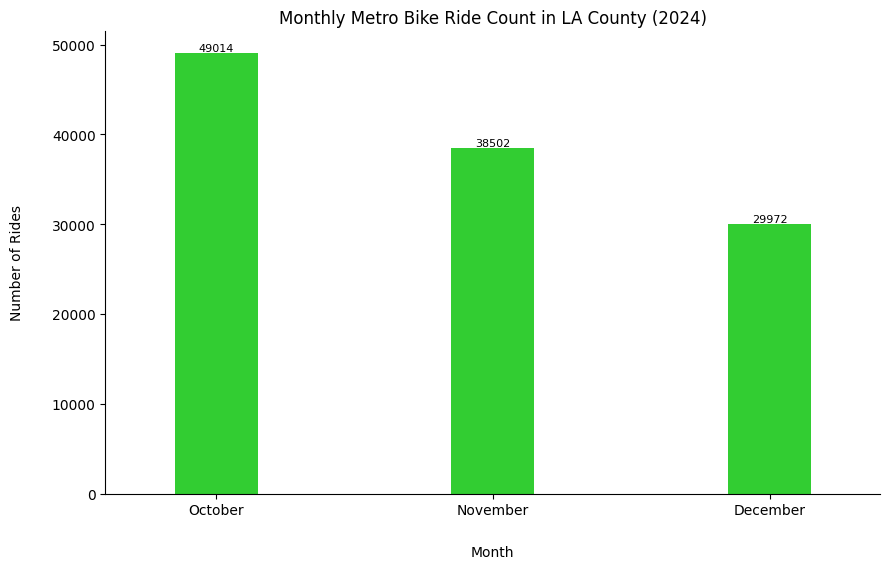

In [ ]:
# visualizing the number of rides per month
import matplotlib.pyplot as plt

ax = df['month'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Monthly Metro Bike Ride Count in LA County (2024)', fontsize=12)
plt.xlabel('Month', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

The ride count decreases as the year progresses during Q4. The winter wet season begins in November and it does get cooler, so there is a weather link.

In [ ]:
df['start_time'] = pd.to_datetime(df['start_time'])

In [ ]:
df['day'] = df['start_time'].dt.day_name()

In [ ]:
df['day']

,day
0,Tuesday
1,Tuesday
2,Tuesday
3,Tuesday
4,Tuesday
...,...
120849,Tuesday
120850,Tuesday
120851,Tuesday
120852,Tuesday


Text(0, 0.5, 'Number of Rides')

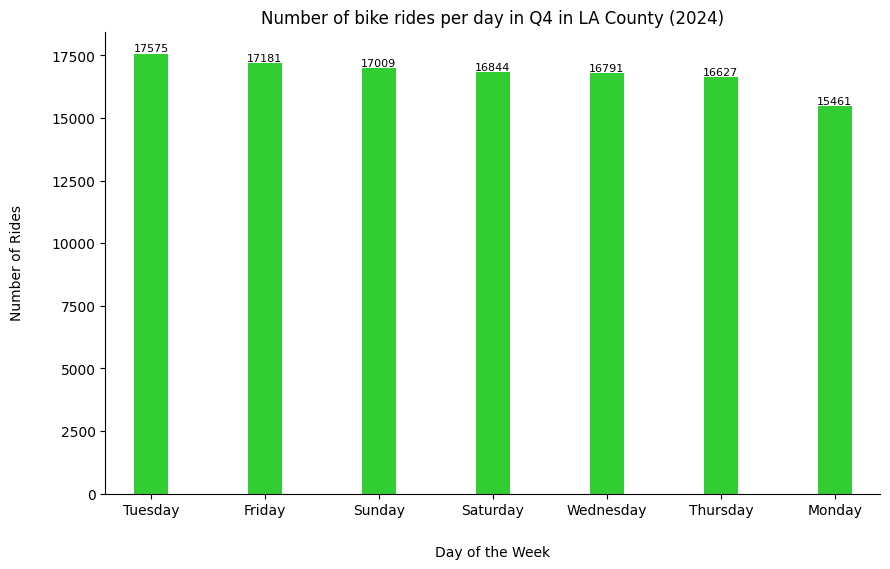

In [ ]:
# visualizing the number of rides based on day of the week
import matplotlib.pyplot as plt

ax = df['day'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of bike rides per day in Q4 in LA County (2024)', fontsize=12)
plt.xlabel('Day of the Week', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

In Q4, Tuesday has the highest ridership followed by Friday and then Sunday.

Distribution of rides per day based on month

In [ ]:
df_october = df[df['month'] == 'October']
df_november = df[df['month'] == 'November']
df_december = df[df['month'] == 'December']

Text(0, 0.5, 'Number of Rides')

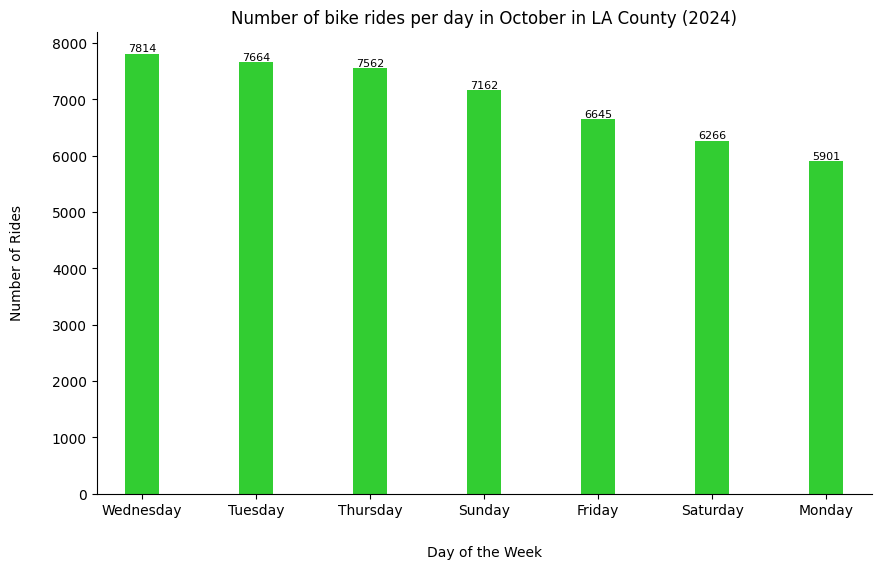

In [ ]:
# visualizing the number of rides based on day of the week
import matplotlib.pyplot as plt

ax = df_october['day'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of bike rides per day in October in LA County (2024)', fontsize=12)
plt.xlabel('Day of the Week', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

Wednesday is leading the list followed by Tuesday in the month of October

Text(0, 0.5, 'Number of Rides')

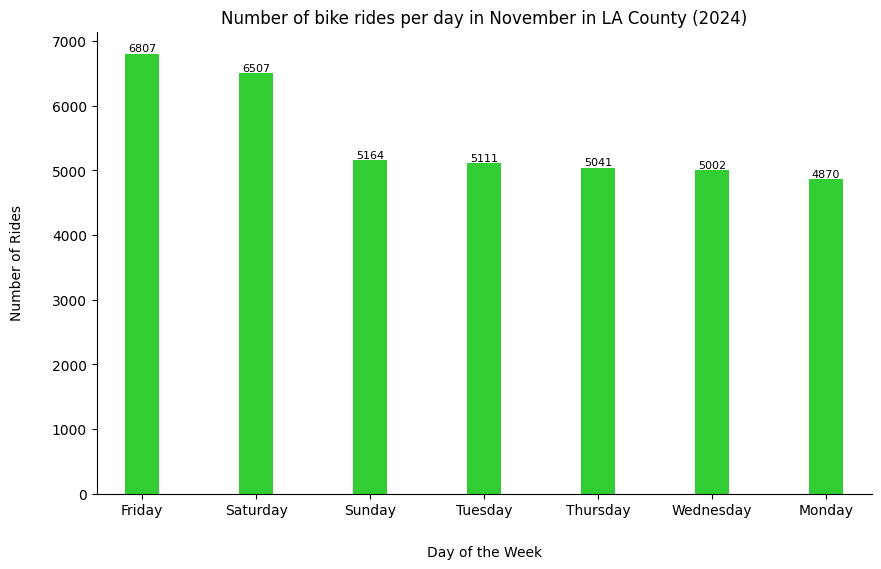

In [ ]:
# visualizing the number of rides based on day of the week
import matplotlib.pyplot as plt

ax = df_november['day'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of bike rides per day in November in LA County (2024)', fontsize=12)
plt.xlabel('Day of the Week', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

Friday is leading the list followed by Saturday and then Sunday in the month of November

Text(0, 0.5, 'Number of Rides')

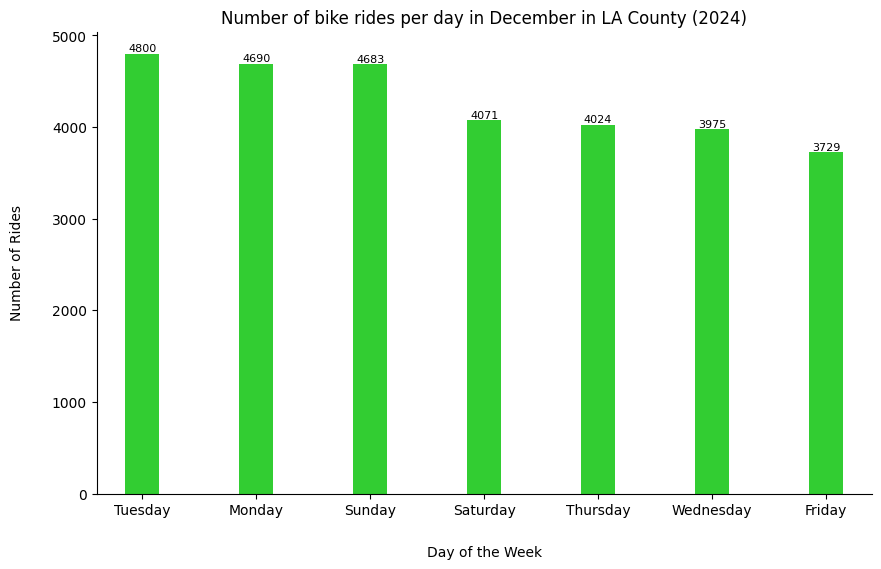

In [ ]:
# visualizing the number of rides based on day of the week
import matplotlib.pyplot as plt

ax = df_december['day'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of bike rides per day in December in LA County (2024)', fontsize=12)
plt.xlabel('Day of the Week', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

Tuesday is leading the list followed by Monday in the month of December

In [ ]:
df['bike_type'].unique()

array(['electric', 'standard'], dtype=object)

Text(0, 0.5, 'Number of Rides')

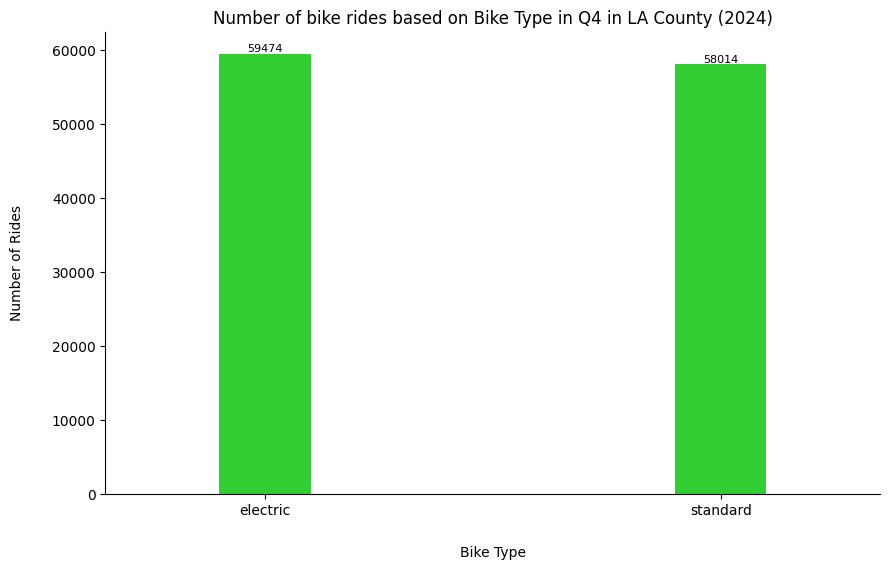

In [ ]:
import matplotlib.pyplot as plt

ax = df['bike_type'].value_counts().plot(kind='bar', figsize=(10,6), color='limegreen', width=0.2)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Number of bike rides based on Bike Type in Q4 in LA County (2024)', fontsize=12)
plt.xlabel('Bike Type', labelpad=20)
plt.xticks(rotation=0)
plt.ylabel('Number of Rides', labelpad=20)

The electric bike type is the more popular choice out of the two. Electric bikes are quicker and require less effort for people to pedal.

In [ ]:
df.groupby('bike_type')['duration'].mean()

,duration
bike_type,
electric,29.009517
standard,29.729496


The mean duration of rides for the elecric bike type is lower than the standard bike type. This isn't surprising because electric bikes are powered by a mid-drive pedal-assist motor capable of speeds up to 17 mph with an electric "boost." The motor engages when you pedal.

In [ ]:
pip install geopy

In [ ]:
# importing the Nominatim class from the geopy.geocoders module
from geopy.geocoders import Nominatim

# creating an instance of the Nominatim geocoder/class
geolocator = Nominatim(user_agent="geoapi")

# coordinates are sent to the Nominatim api
location = geolocator.reverse((34.045570,-118.274193))
print(location.address)

In [ ]:
from time import sleep

In [ ]:
# separate dataframe for destination stations
destination_df = df[['end_lat','end_lon']]
destination_df.head(10)

,end_lat,end_lon
0,34.045570,-118.274193
1,34.035351,-118.434143
2,34.045540,-118.256668
3,34.043522,-118.255089
4,34.048500,-118.258537
5,34.022091,-118.279793
6,34.053551,-118.255836
7,34.063179,-118.245880
8,33.989079,-118.462257
9,34.022091,-118.279793


In [ ]:
destination_top10 = destination_df.value_counts().head(10).reset_index(name='count')
destination_top10.head()

,end_lat,end_lon,count
0,34.014309,-118.491341,4384
1,33.995560,-118.481552,3610
2,34.048500,-118.258537,3365
3,34.048401,-118.260948,3139
4,34.045540,-118.256668,2975


In [ ]:
def address_finder(x,y):

  # try these commands
  try:
    location = geolocator.reverse((x,y))
    # pauses the execution of a program for 1 second
    sleep(1)
    return location.address
  except:
  # if they dont work, return None
    return None

destination_top10['location'] = destination_top10.apply(lambda row: address_finder(row['end_lat'], row['end_lon']), axis=1)

In [ ]:
destination_top10

,end_lat,end_lon,count,location
0,34.014309,-118.491341,4384,"Colorado Avenue, Downtown Santa Monica, Santa ..."
1,33.995560,-118.481552,3610,"Metro Bike Share, Venice Beach Bike Path, Veni..."
2,34.048500,-118.258537,3365,"Los Angeles Streetcar, Wilshire Boulevard, Fin..."
3,34.048401,-118.260948,3139,"Figueroa & 8th, 735, South Figueroa Street, Fi..."
4,34.045540,-118.256668,2975,"Olive & 8th, 729, South Olive Street, Jewelry ..."
5,33.984341,-118.471550,2532,"20th Avenue, Venice Canal Historic District, V..."
6,34.062111,-118.446922,2269,"1031, Broxton Avenue, Westwood Village, Westwo..."
7,34.069752,-118.445351,2096,"Metro Bike Share Gateway Plaza, Westwood Plaza..."
8,34.046131,-118.257591,2080,"Metro Bike Share, South Grand Avenue, Financia..."
9,34.045021,-118.253189,1682,"7th & Broadway, 307, West 7th Street, Jewelry ..."


In [ ]:
destination_top10['location'][0]

'Colorado Avenue, Downtown Santa Monica, Santa Monica, Los Angeles County, California, 90401, United States'

The most popular Metro Bike Share destination in Q4 is Colorado Avenue in Santa Monica

In [ ]:
import plotly.express as px

# Set the correct renderer for Colab
import plotly.io as pio
pio.renderers.default = 'colab'

# creating a scatter plot
fig = px.scatter_mapbox(
    destination_top10,
    lat='end_lat',
    lon='end_lon',
    size='count',
    color='location',
    title="Most Popular Metro Bike Ride Destinations in LA County",
    hover_data={"count":True, "end_lat": False, "end_lon": False},
    color_continuous_scale=px.colors.sequential.Greens,
    zoom=15,
    mapbox_style="carto-darkmatter")

fig.update_layout(
    height=600,
    # Reduce white space/margins
    margin={"r":0,"t":40,"l":0,"b":0},
    # to hide the sidebar with color labels, text is too long otherwise
    showlegend=False
)

fig.show()

In [ ]:
import plotly.express as px

# Set the correct renderer for Colab
import plotly.io as pio
pio.renderers.default = 'colab'

# creating a scatter plot
fig = px.scatter_mapbox(
    destination_top10,
    lat='end_lat',
    lon='end_lon',
    size='count',
    color='location',
    title="Most Popular Metro Bike Ride Destinations in LA County",
    hover_data={"count":True, "end_lat": False, "end_lon": False},
    color_continuous_scale=px.colors.sequential.Greens,
    zoom=15,
    mapbox_style="open-street-map")

fig.update_layout(
    height=600,
    # Reduce white space/margins
    margin={"r":0,"t":40,"l":0,"b":0},
    # to hide the sidebar with color labels, text is too long otherwise
    showlegend=False
)

fig.show()

In [ ]:
destination_top10['clean_location'] = destination_top10['location'].str.split(',').str[:2].str.join(', ')
destination_top10

,end_lat,end_lon,count,location,clean_location
0,34.014309,-118.491341,4384,"Colorado Avenue, Downtown Santa Monica, Santa ...","Colorado Avenue, Downtown Santa Monica"
1,33.995560,-118.481552,3610,"Metro Bike Share, Venice Beach Bike Path, Veni...","Metro Bike Share, Venice Beach Bike Path"
2,34.048500,-118.258537,3365,"Los Angeles Streetcar, Wilshire Boulevard, Fin...","Los Angeles Streetcar, Wilshire Boulevard"
3,34.048401,-118.260948,3139,"Figueroa & 8th, 735, South Figueroa Street, Fi...","Figueroa & 8th, 735"
4,34.045540,-118.256668,2975,"Olive & 8th, 729, South Olive Street, Jewelry ...","Olive & 8th, 729"
5,33.984341,-118.471550,2532,"20th Avenue, Venice Canal Historic District, V...","20th Avenue, Venice Canal Historic District"
6,34.062111,-118.446922,2269,"1031, Broxton Avenue, Westwood Village, Westwo...","1031, Broxton Avenue"
7,34.069752,-118.445351,2096,"Metro Bike Share Gateway Plaza, Westwood Plaza...","Metro Bike Share Gateway Plaza, Westwood Plaza"
8,34.046131,-118.257591,2080,"Metro Bike Share, South Grand Avenue, Financia...","Metro Bike Share, South Grand Avenue"
9,34.045021,-118.253189,1682,"7th & Broadway, 307, West 7th Street, Jewelry ...","7th & Broadway, 307"


Text(0, 0.5, 'Number of Rides')

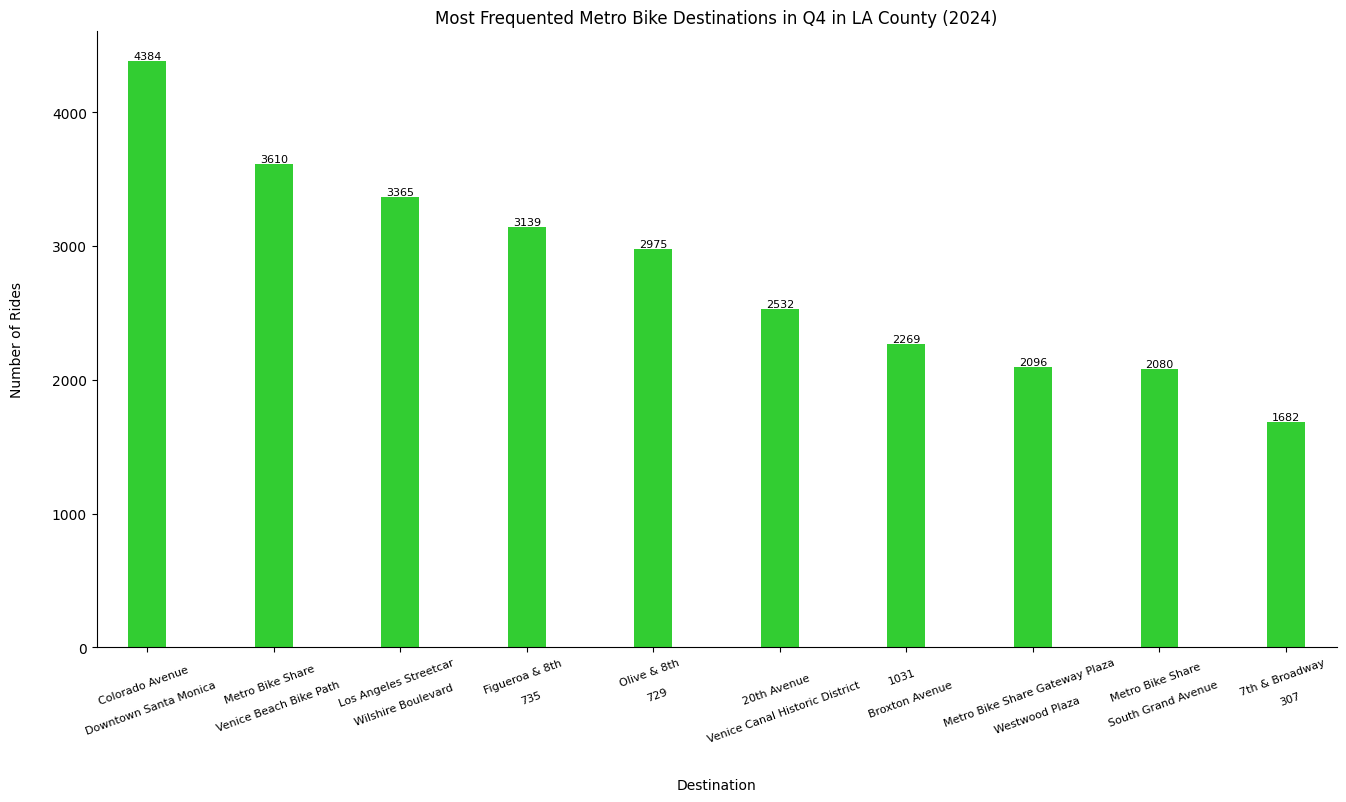

In [ ]:
ax = destination_top10['count'].plot(kind='bar', figsize=(16,8), color='limegreen', width=0.3)

# Add numbers on top of the bars
ax.bar_label(ax.containers[0], fontsize=8, color='black')

# hiding the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.title('Most Frequented Metro Bike Destinations in Q4 in LA County (2024)', fontsize=12)
plt.xlabel('Destination', labelpad=20)
plt.xticks(ticks = range(len(destination_top10['clean_location'])),labels=destination_top10['clean_location'].str.replace(',','\n'), fontsize=8, rotation=20)
plt.ylabel('Number of Rides', labelpad=20)